In [1]:
# Reference
# https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
# https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154
# https://www.kaggle.com/code/yasserh/housing-price-prediction-best-ml-algorithms
# https://www.kaggle.com/code/erick5/predicting-house-prices-with-machine-learning
# https://www.kaggle.com/code/tomasmantero/predicting-house-prices-keras-ann
# https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
# https://www.kaggle.com/code/zoupet/neural-network-model-for-house-prices-tensorflow/notebook

In [2]:
# dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Problem Statement: House Price Prediction
> To understand the relationship between house features and how these variables are used to predict house price.

Dataset: ([House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction))

# Objective


> Using two different models in terms of minimizing the difference between predicted and actual rating


# Feature Columns
> id - Unique ID for each home sold

> date - Date of the home sale

> price - Price of each home sold

> bedrooms - Number of bedrooms

> bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

> sqft_living - Square footage of the apartments interior living space

> sqft_lot - Square footage of the land space

> floors - Number of floors

> waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

> view - An index from 0 to 4 of how good the view of the property was

> condition - An index from 1 to 5 on the condition of the apartment

> grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

> sqft_above - The square footage of the interior housing space that is above ground level

> sqft_basement - The square footage of the interior housing space that is below ground level

> yr_built - The year the house was initially built

> yr_renovated - The year of the house’s last renovation

> zipcode - What zipcode area the house is in

> lat - Lattitude

> long - Longitude

> sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

> sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



# 1. Import libraries

In [3]:
# import required libraries


# data analysis and wrangling
import pandas as pd
import numpy as np
import math
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

# 2. Load dataset

In [4]:
# read the csv file 
Data = pd.read_csv('kc_house_data.csv')
Data.shape

(21613, 21)

In [5]:
target = 'price'
features = [i for i in Data.columns if i not in [target]]

original_df = Data.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(Data.shape[1], Data.shape[0]))


Inference: The Datset consists of 21 features & 21613 samples.


In [6]:
# view sample data

d = Data.head(3).T
d

,0,1,2
id,7129300520,6414100192,5631500400
date,20141013T000000,20141209T000000,20150225T000000
price,221900.0,538000.0,180000.0
bedrooms,3,3,2
bathrooms,1.0,2.25,1.0
sqft_living,1180,2570,770
sqft_lot,5650,7242,10000
floors,1.0,2.0,1.0
waterfront,0,0,0
view,0,0,0


In [7]:
# Feature data types

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# Checking number of unique rows in each feature

Data.nunique().sort_values()

waterfront           2
view                 5
condition            5
floors               6
grade               12
bedrooms            13
bathrooms           30
zipcode             70
yr_renovated        70
yr_built           116
sqft_basement      306
date               372
long               752
sqft_living15      777
sqft_above         946
sqft_living       1038
price             4028
lat               5034
sqft_lot15        8689
sqft_lot          9782
id               21436
dtype: int64

In [9]:
# # Find number of numerical and Categorical feature

# #Checking number of unique rows in each feature

# df = Data
# nu = df[features].nunique().sort_values()
# nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

# for i in range(df[features].shape[1]):
#     if nu.values[i]<=16:cf.append(nu.index[i])
#     else: nf.append(nu.index[i])

# print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

#3. Data Preprocessing

In [10]:
# let's drop unnecessory featurs

Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)


In [11]:
# check if there are any Null values
Data.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# drop missing/ null row values
Data.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


# 4. Explanatory Data Analysis

In [13]:
# Find number of numerical and Categorical feature

#Checking number of unique rows in each feature

df = Data
nu = df.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 13 numerical & 6 categorical features.


###4.1  Describe the distribution

In [14]:
# describe the distribution of data
Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


###4.2  Find correlation of data
>  Correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables

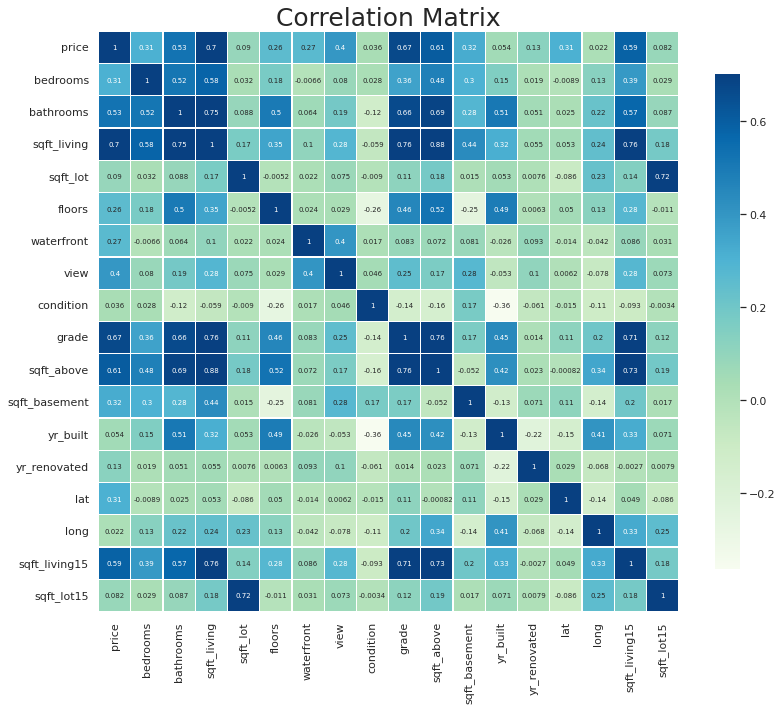

In [15]:
# Print Correlation matrix
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(Data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [16]:
# Feature Correlated to price - Descending order

price_corr = Data.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


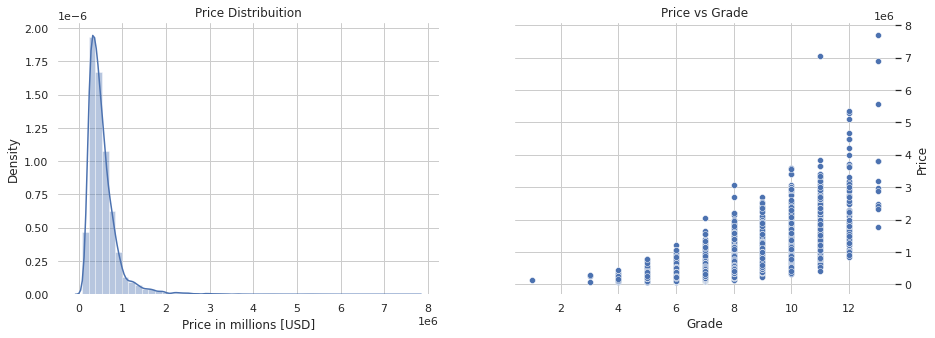

In [17]:
#visualizing house prices correlation

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(Data['price'], ax=axes[0])
sns.scatterplot(y='price',x='grade', data=Data, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='Density', title='Price Distribuition')
axes[1].set(xlabel='Grade', ylabel='Price', title='Price vs Grade')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

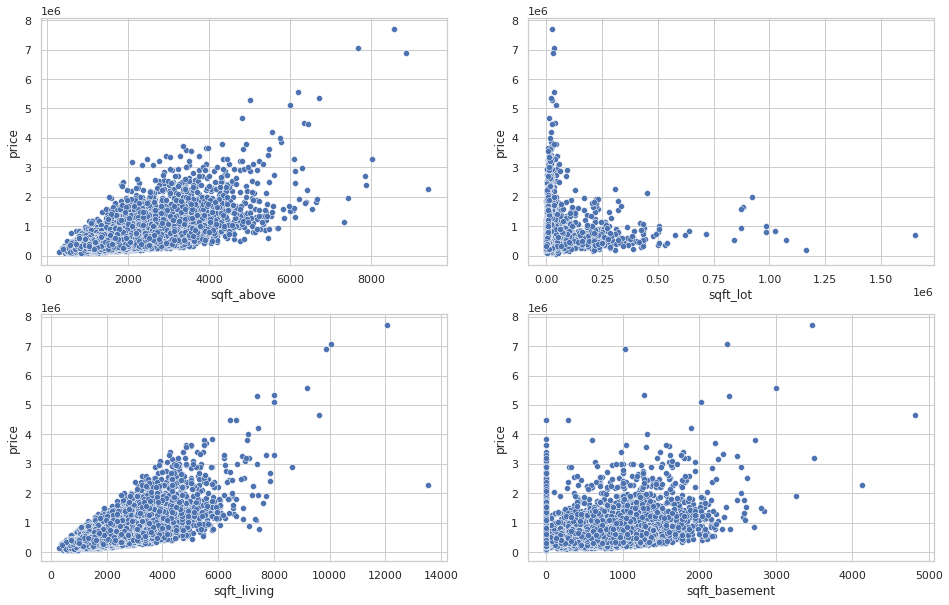

In [18]:
#visualizing square footage of (home,lot,above and basement)

fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])


[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'View'),
 Text(0.5, 1.0, 'View vs Price Box Plot')]

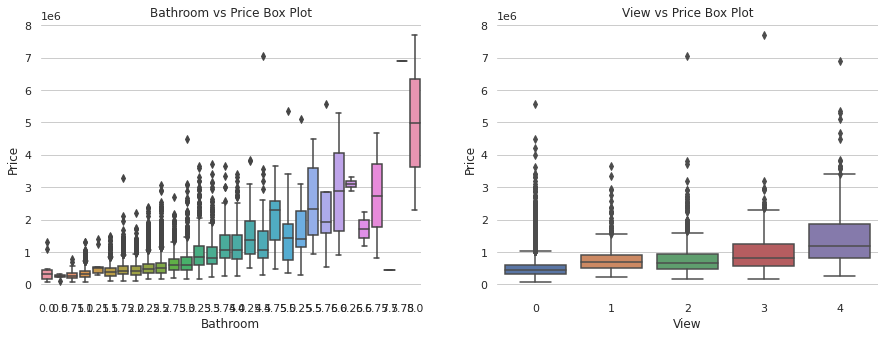

In [19]:
# visualizing next 2 important features

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bathroom', ylabel='Price', title='Bathroom vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'Latitude vs Price Box Plot')]

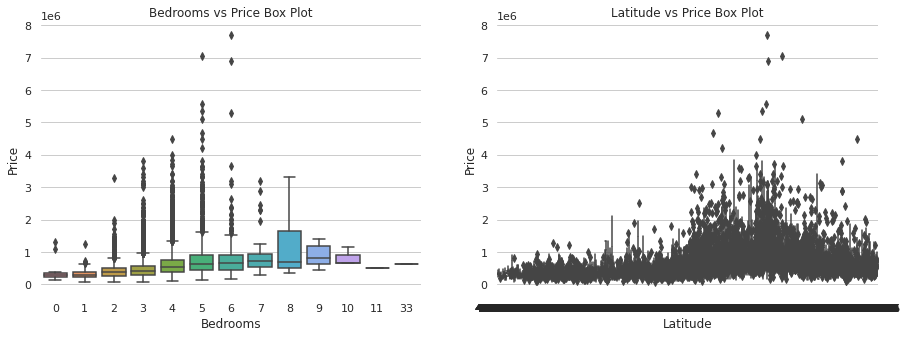

In [20]:
# visualizing next 2 important features

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['lat'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Latitude', ylabel='Price', title='Latitude vs Price Box Plot')

In [21]:
#let's break date to years, months

Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)

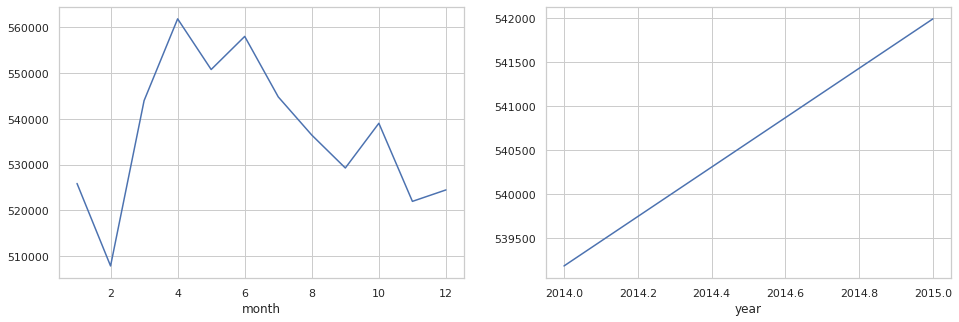

In [22]:

#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

###4.3  Find categorical and numerical features of data

In [23]:
# #Understanding the relationship between all the features

# g = sns.pairplot(df)
# plt.title('Pairplots for all the Feature')
# g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

In [24]:
# #Visualising the categorical features 

# print('\033[1mVisualising Categorical Features:'.center(100))

# n=3
# plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=8:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(3,1,3)
#         sns.countplot(df[cf[i]])
        
# plt.tight_layout()
# plt.show()

In [25]:
# #Visualising the numeric features 

# print('\033[1mNumeric Features Distribution'.center(130))
# df =Data
# n=3

# clr=['r','g','b','g','b','r']

# plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
# for i in range(len(nf)):
#     plt.subplot(math.ceil(len(nf)/3),n,i+1)
#     sns.distplot((df[nf[i]]),hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
# plt.tight_layout()
# plt.show()

# # plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
# # for i in range(len(nf)):
# #     plt.subplot(math.ceil(len(nf)/3),n,i+1)
# #     df.boxplot(nf[i])
# # plt.tight_layout()
# # plt.show()

In [26]:
# #visualizing bedrooms, bathrooms, floors,grades

# fig = plt.figure(figsize=(15,7),constrained_layout=True)
# fig.add_subplot(2,2,1)
# sns.countplot(Data['bedrooms'], palette = 'Greens_d')
# fig.add_subplot(2,2,2)
# sns.countplot(Data['floors'])
# fig.add_subplot(2,2,3)
# sns.countplot(Data['bathrooms'])
# fig.add_subplot(2,2,4)
# sns.countplot(Data['grade'])
# plt.tight_layout()

#5. Removing Outliers excluding 25%-75% 

In [27]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
4,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,1715,0,1995,0,47.3097,-122.327,2238,6819,6,2014



Inference:
Before removal of outliers, The dataset had 21613 samples.
After removal of outliers, The dataset now has 21613 samples.


#6. Data Normalization, Scaling and Test/Train Split

In [28]:
df = df.drop('date',axis=1)

In [29]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


In [31]:
df.head(3).T

,0,1,2
price,221900.0000,538000.000,180000.0000
bedrooms,3.0000,3.000,2.0000
bathrooms,1.0000,2.250,1.0000
sqft_living,1180.0000,2570.000,770.0000
sqft_lot,5650.0000,7242.000,10000.0000
floors,1.0000,2.000,1.0000
waterfront,0.0000,0.000,0.0000
view,0.0000,0.000,0.0000
condition,3.0000,3.000,3.0000
grade,7.0000,7.000,6.0000


In [32]:
#standardization scaler - fit&transform on train, fit only on test
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


#7. Define the model 

In [33]:
model = Sequential()

# input layer- 1
model.add(Dense(32,activation='relu'))

# hidden layers- 3
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))

# output layer-1
model.add(Dense(1, activation='linear'))



In [34]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#8. Compile the model

In [35]:
# Compile the model

optimizer=tensorflow.keras.optimizers.Adam(learning_rate=3e-3)
model.compile(optimizer= optimizer,loss='mse', metrics=['mean_absolute_error'])

In [36]:
# Run the model

# model.fit(x=X_train,y=y_train,
#           validation_data=(X_test,y_test),
#           batch_size=128,epochs=20000)

model.fit(x=X_train,y=y_train, batch_size=128,epochs=500, validation_split = 0.2, callbacks=callbacks_list)
model.summary()

Epoch 1/500
92/95 [============================>.] - ETA: 0s - loss: 287415533568.0000 - mean_absolute_error: 395701.5625
Epoch 1: val_loss improved from inf to 78555299840.00000, saving model to Weights-001--78555299840.00000.hdf5
95/95 [==============================] - 3s 13ms/step - loss: 282186940416.0000 - mean_absolute_error: 390429.3438 - val_loss: 78555299840.0000 - val_mean_absolute_error: 189665.1562
Epoch 2/500
95/95 [==============================] - ETA: 0s - loss: 87481540608.0000 - mean_absolute_error: 186847.2188
Epoch 2: val_loss improved from 78555299840.00000 to 57173602304.00000, saving model to Weights-002--57173602304.00000.hdf5
95/95 [==============================] - 1s 14ms/step - loss: 87481540608.0000 - mean_absolute_error: 186847.2188 - val_loss: 57173602304.0000 - val_mean_absolute_error: 159371.8438
Epoch 3/500
92/95 [============================>.] - ETA: 0s - loss: 60972683264.0000 - mean_absolute_error: 148958.4219
Epoch 3: val_loss improved from 57173

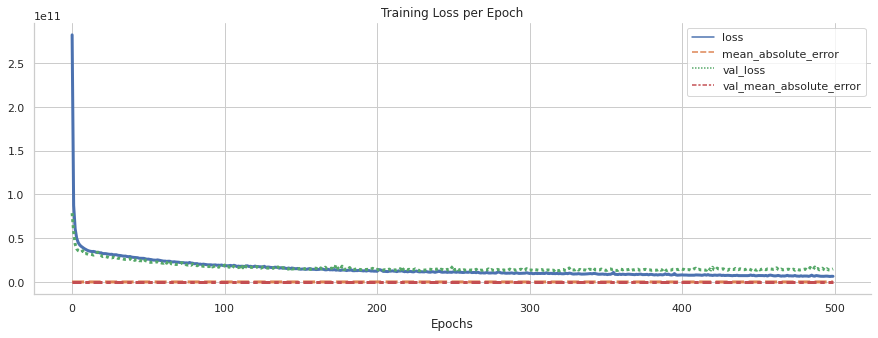

In [37]:
#plot train and validation accuracy

losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

#9. Test the model

In [38]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 1s 3ms/step
MAE:  70841.64522285626
MSE:  16404881536.080944
RMSE:  128081.54252694236
Variance Regression Score:  0.8830683629509477


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


#10. Model Predictor vs. Perfect fit

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

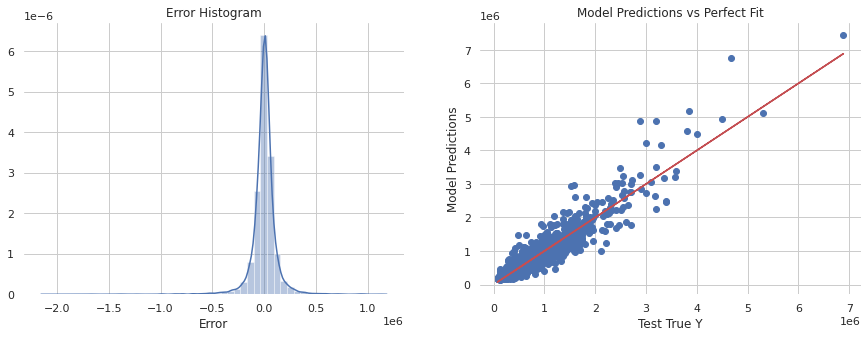

In [39]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

# 11. Predicting on a brand new data

In [40]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 [==============================] - 0s 44ms/step

Prediction Price: 210472.48

Original Price: 221900.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
